<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

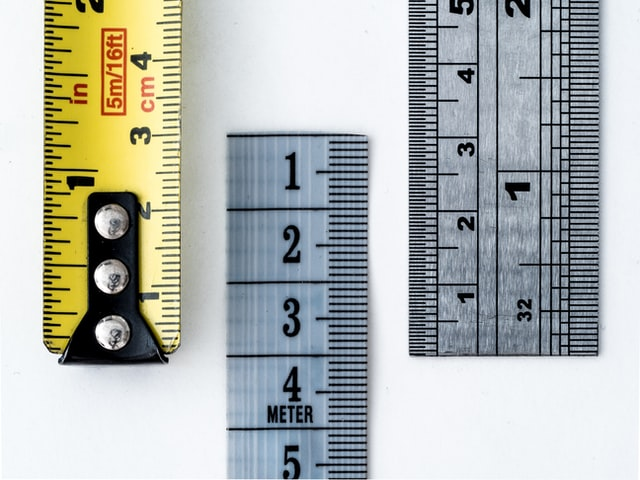<span>Photo by <a href="https://unsplash.com/@wwarby?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">William Warby</a> on <a href="https://unsplash.com/@wwarby?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

## Table of Content
- **<a href="#2.4">Feature Scaling</a>**
  - **<a href="#2.4.1">Standardization (Z-score Normalization)</a>**
  - **<a href="#2.4.2">Mean normalization</a>**
  - **<a href="#2.4.3">Min-Max scaling</a>**
  - **<a href="#2.4.4">Max-Abs Scaling</a>**
  - **<a href="#2.4.5">Robust Scaling</a>**
  - **<a href="#2.4_">Comparision of Scaling Techniques</a>**
  - **<a href="#2.4.6">Unit Vector</a>**
    - **<a href="#2.4.6.1">Max Normalization</a>**
    - **<a href="#2.4.6.2">L1 Normalization</a>**
    - **<a href="#2.4.6.3">L2 Normalization</a>**
  - **<a href="#2.4.7">Feature Scaling requirement in Machine Learning algorithm</a>**

<a id="2.4"></a>
## 2.4 Feature Scaling 
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. [Wiki](https://en.wikipedia.org/wiki/Feature_scaling)

- In feature scaling we scale down value with some magnitude and unit.
- Feature are depends upon the magnitude and units. `Example:-` $500 kg$, $500$ is magnitude and $kg$ is unit.
<img src="FeatureEng_Imgs/FE6.png" width="500"/>
[Image Source](https://medium.com/lets-talk-ml/scaling-the-data-for-machine-learning-standardisation-and-normalisation-26ae02b1d101)

**Note:** Wherever the Euclidean Distance, Manhattan Distance or Minkowski Distance is user in the Learning Algorithm, the `Feature Scaling` is required to perform for optimize result. Distance based algorithm are sensitive towards the magnitude.

***There are four most common methods to perform feature scaling;***
- Standarization
- Mean Normalization
- Min-Max Scaling
- Unit Vector

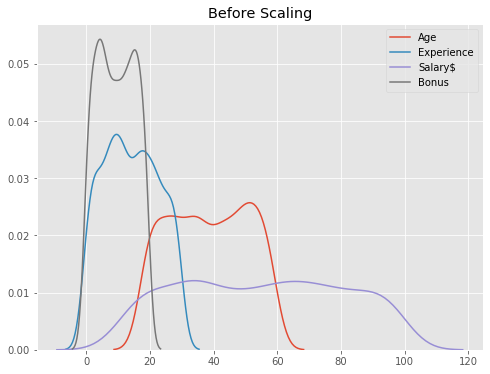

,Age,Experience,Salary$,Bonus
0,45.0,13.0,82.0,17.0
1,36.0,21.0,33.0,9.0
2,26.0,26.0,59.0,15.0
3,46.0,2.0,67.0,13.0
4,53.0,3.0,44.0,18.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

## Generating a dataframe of employees details
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 1000).astype(float),
    'Experience': np.random.randint(0, 30, 1000).astype(float),
    'Salary$': np.random.randint(10, 100, 1000).astype(float),
    'Bonus': np.random.randint(0, 20, 1000).astype(float),
})

plt.figure(figsize=(8,6))
plt.title('Before Scaling')
sns.kdeplot(data['Age'])
sns.kdeplot(data['Experience'])
sns.kdeplot(data['Salary$'])
sns.kdeplot(data['Bonus'])
plt.show()

data.head()

<a id="2.4.1"></a>
### 2.4.1 Standardization (Z-score Normalization)

- Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 
- This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks).

$$x' = \frac{x - \bar{x}}{\sigma}$$

Where $x$ is the original feature vector, ${\bar {x}}={\text{average}}(x)$ is the mean of that feature vector, and $\sigma$  is its standard deviation.

***In simple statistic form we can say, it replce the values by their $Z-score$ and re-scales a feature value so that it has distribution with `0` mean value and variance equals to `1`.***

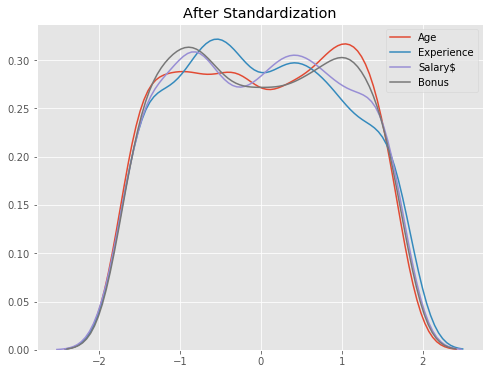

,Age,Experience,Salary$,Bonus
0,0.526292,-0.134145,1.057316,1.307769
1,-0.204895,0.803110,-0.863793,-0.079600
2,-1.017324,1.388894,0.155571,0.960927
3,0.607535,-1.422869,0.469221,0.614084
4,1.176236,-1.305712,-0.432524,1.481190


In [2]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Standardization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.2"></a>
### 2.4.2 Mean normalization

$$ x'={\frac {x-{\text{average}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

where $x$ is an original value, $x'$ is the normalized value. There is another form of the means normalization which is when we divide by the standard deviation which is also called `standardization`.


In [3]:
X_std = (data - data.mean(axis=0)) / (data.max(axis=0) - data.min(axis=0))
X_std.head()

,Age,Experience,Salary$,Bonus
0,0.158000,-0.039483,0.303011,0.396895
1,-0.061512,0.236379,-0.247551,-0.024158
2,-0.305415,0.408793,0.044584,0.291632
3,0.182390,-0.418793,0.134472,0.186368
4,0.353122,-0.384310,-0.123955,0.449526


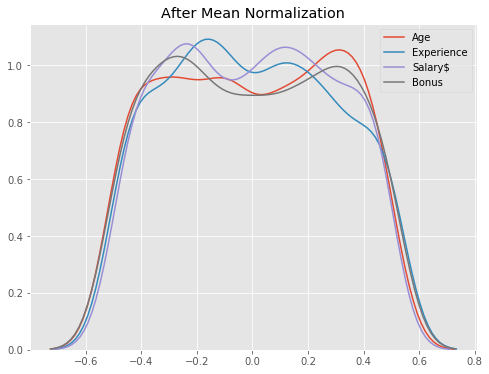

,Age,Experience,Salary$,Bonus
0,0.158000,-0.039483,0.303011,0.396895
1,-0.061512,0.236379,-0.247551,-0.024158
2,-0.305415,0.408793,0.044584,0.291632
3,0.182390,-0.418793,0.134472,0.186368
4,0.353122,-0.384310,-0.123955,0.449526


In [4]:
from sklearn import preprocessing

scaled_data = X_std

plt.figure(figsize=(8,6))
plt.title('After Mean Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.3"></a>
### 2.4.3 Min-Max scaling
Also known as min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

where $x$ is an original value, $x'$ is the normalized value. 

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min ## To scaled as per the requirement

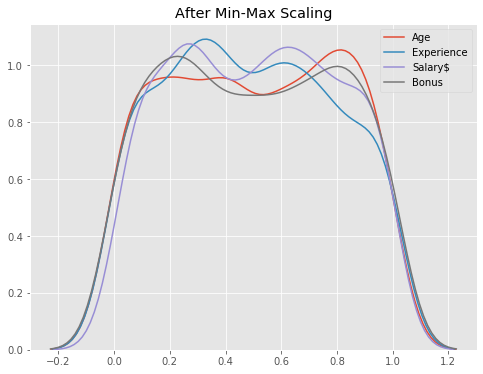

,Age,Experience,Salary$,Bonus
0,0.658537,0.448276,0.808989,0.894737
1,0.439024,0.724138,0.258427,0.473684
2,0.195122,0.896552,0.550562,0.789474
3,0.682927,0.068966,0.640449,0.684211
4,0.853659,0.103448,0.382022,0.947368


In [5]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Min-Max Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.4"></a>
### 2.4.4 Max-Abs Scaling
`MaxAbsScaler` works in a very similar fashion like min-max scaling, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

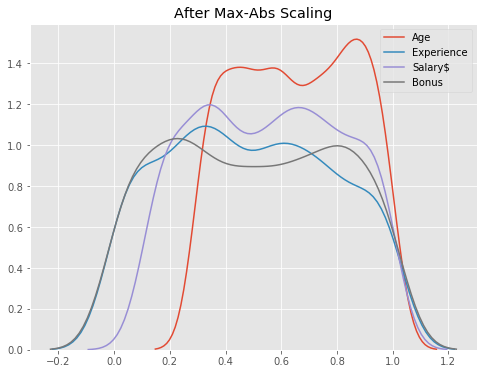

,Age,Experience,Salary$,Bonus
0,0.762712,0.448276,0.828283,0.894737
1,0.610169,0.724138,0.333333,0.473684
2,0.440678,0.896552,0.595960,0.789474
3,0.779661,0.068966,0.676768,0.684211
4,0.898305,0.103448,0.444444,0.947368


In [6]:
from sklearn import preprocessing

scaler = preprocessing.MaxAbsScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Max-Abs Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.5"></a>
### 2.4.5 Robust Scaling

- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

- Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

$$x'={\frac  {x_i–Q_1(x)}{Q_3(x)–Q_1(x)}}$$

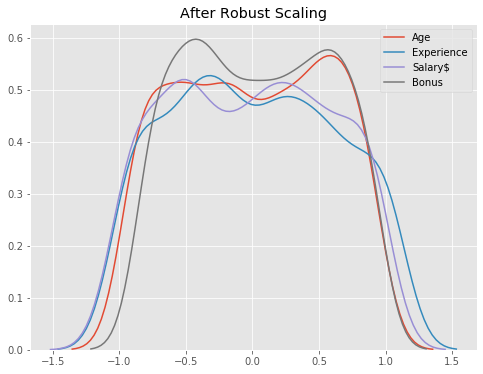

,Age,Experience,Salary$,Bonus
0,0.295455,-0.071429,0.604651,0.727273
1,-0.113636,0.500000,-0.534884,0.000000
2,-0.568182,0.857143,0.069767,0.545455
3,0.340909,-0.857143,0.255814,0.363636
4,0.659091,-0.785714,-0.279070,0.818182


In [7]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Robust Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4_"></a>
### Comparision of Scaling Techniques

<img src="FeatureEng_Imgs/FeatureScaling1.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling2.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling3.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling4.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling5.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling6.png" width="400"/>

<a id="2.4.6"></a>
### 2.4.6 Unit Vector
 
Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:

$${\displaystyle x'={\frac {x}{\left\|{x}\right\|}}}$$

There are different ways to define “length” such as as L1 or L2-normalization. It can be more practical to use the L1 norm of the feature vector. 

<a id="2.4.6.1"></a>
####  Max Normalization
The max norm uses the absolute maximum and does for samples what the MaxAbsScaler does for features.

$$x_{normalized} = \frac{ x} {max(x)}$$

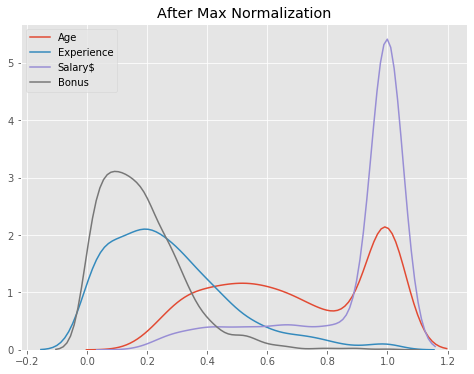

,Age,Experience,Salary$,Bonus
0,0.548780,0.158537,1.000000,0.207317
1,1.000000,0.583333,0.916667,0.250000
2,0.440678,0.440678,1.000000,0.254237
3,0.686567,0.029851,1.000000,0.194030
4,1.000000,0.056604,0.830189,0.339623


In [8]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='max')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Max Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.6.2"></a>
#### L1 Normalization
The l1 norm uses the sum of all the values as and thus gives equal penalty to all parameters, enforcing sparsity.

$$x_{normalized} = \frac{ x} {sum(x)}$$

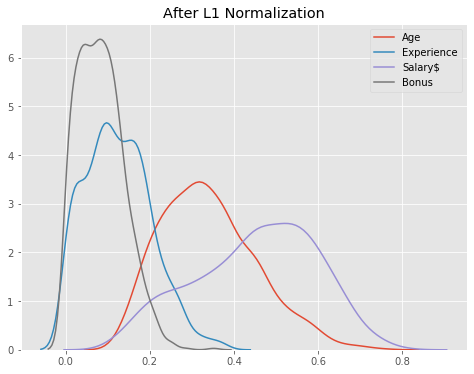

,Age,Experience,Salary$,Bonus
0,0.286624,0.082803,0.522293,0.108280
1,0.363636,0.212121,0.333333,0.090909
2,0.206349,0.206349,0.468254,0.119048
3,0.359375,0.015625,0.523438,0.101562
4,0.449153,0.025424,0.372881,0.152542


In [9]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='l1')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After L1 Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.6.3"></a>
#### L2 Normalization
The l2 norm uses the square root of the sum of all the squared values. This creates smoothness and rotational invariance. Some models, like PCA, assume rotational invariance, and so l2 will perform better.

```python
x_normalized = x / sqrt(sum((i**2) for i in X))
```

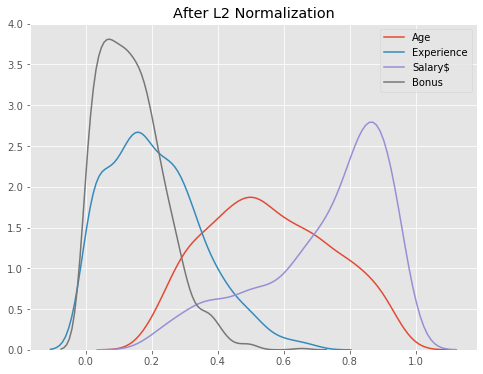

,Age,Experience,Salary$,Bonus
0,0.468979,0.135483,0.854584,0.177170
1,0.667698,0.389490,0.612056,0.166924
2,0.365581,0.365581,0.829588,0.210912
3,0.558737,0.024293,0.813812,0.157904
4,0.743754,0.042099,0.617456,0.252596


In [10]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='l2')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After L2 Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

<a id="2.4.7"></a>
### Feature Scaling requirement in Machine Learning algorithm

|ML Algorithm|Feature Scaling requirement|
|-|-|
|k-mean|Yes|
|KNN|Yes|
|PCA|Yes|
|Linear Regression|Yes|
|Naive Bayes|No|
|Tree based Model|No|
|XGBoost|No|

>**Note:** Any algorithm which is not based on distance formula will affected by `Feature Scaling`.